In [3]:
## inverting CO2 response
import numpy as np
import matplotlib.pyplot as plt
import IIRrational.v2
import scipy.signal as sig

In [4]:
## import CO2 step response data ##
data = np.loadtxt('/Users/daniel_vander-hyde/Documents/OneDrive - Syracuse University/CO2Y_point95W_step_minute_trend_october_18_2018.dat')

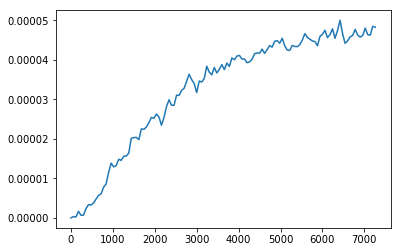

In [5]:
#OCTOBER 18th CO2Y step response data to a .95 W change in CO2Y
t = np.arange(0,len(data[:,0]),1)*60
HWSY = data[:,1]
HWSY = [HWSY[i] + abs(min(HWSY)) for i in range(0,len(HWSY))]
plt.plot(t,HWSY)
plt.show()

In [42]:
# condition
b, a = sig.butter(2, 0.028)
y2 = sig.filtfilt(b,a,HWSY)

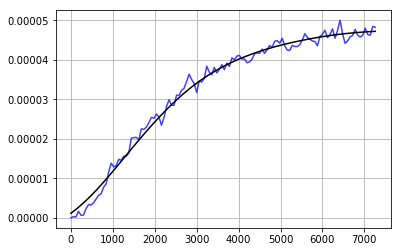

4.8281787e-05


In [43]:
plt.plot(t, HWSY, 'b', alpha=0.75)
plt.plot(t, y2, 'k')
plt.grid(True)
plt.show()
print(HWSY[-1])

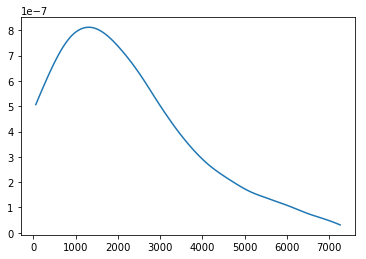

In [44]:
# len/power transfer function
time_plant = [lens/(.95) for lens in y2]
ir = (np.transpose(time_plant[1:]) - np.transpose(time_plant[:-1]))
t_new = np.transpose(t)
plt.plot(t_new[1:], ir)
plt.show()

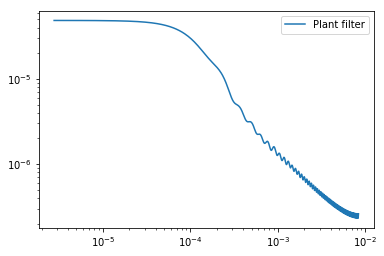

In [47]:
Fs = 1/(t[2]-t[1])
#print(Fs)

[F,H]=sig.freqz(ir,1, worN=3000,whole=False) 
plt.figure()
plt.loglog(F*Fs/(2*np.pi), abs(H), label='Plant filter')
plt.legend()
plt.show()

In [48]:
b, a = sig.butter(2, 10e-4)